In this notebook we plot the [permutahedron](https://en.wikipedia.org/wiki/Permutohedron) of order 4 which is a 3-dimensional polyhedron living in a 4-dimensional space.
It is defined as the convex hull of all permutations of $(0, 1, 2, 3)$.

In [1]:
using Combinatorics, Polyhedra
v = vrep(collect(permutations([0, 1, 2, 3])));

To plot a polyhedron, we need both the H-representation and V-representation so we will need a library to do representation conversion.
We choose [CDD](https://github.com/JuliaPolyhedra/CDDLib.jl) in floating point arithmetic.

In [2]:
using CDDLib
p4 = polyhedron(v, CDDLib.Library());

The permutahedron lives in a 4-dimension space but is 3-dimensional as it is contained in the hyperplane $x_1 + x_2 + x_3 + x_4 = 0 + 1 + 2 + 3 = 6$.
We choose an orthogonal basis of this hyperplane: $(1, -1, 0, 0)$, $(1, 1, -2, 0)$ and $(1, 1, 1, -3)$.

In [3]:
v1 = [1, -1,  0,  0]
v2 = [1,  1, -2,  0]
v3 = [1,  1,  1, -3];

We project the polyhedron in this basis to obtain a full dimensional 3-dimensional polyhedron living in a 3-dimensional space.

In [4]:
p3 = project(p4, [v1 v2 v3]);

We can now plot this polyhedron with [MeshCat](https://github.com/rdeits/MeshCat.jl) or [Makie](https://github.com/JuliaPlots/Makie.jl) as follows:

In [6]:
using MeshCat
m = Polyhedra.Mesh(p3)
vis = Visualizer()
setobject!(vis, m)
IJuliaCell(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8700
└ @ MeshCat /home/blegat/.julia/packages/MeshCat/oC0sL/src/visualizer.jl:73


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), Set{Any}(), ip"127.0.0.1", 8700))

In [7]:
using Makie, CairoMakie
Makie.inline!(true)

true

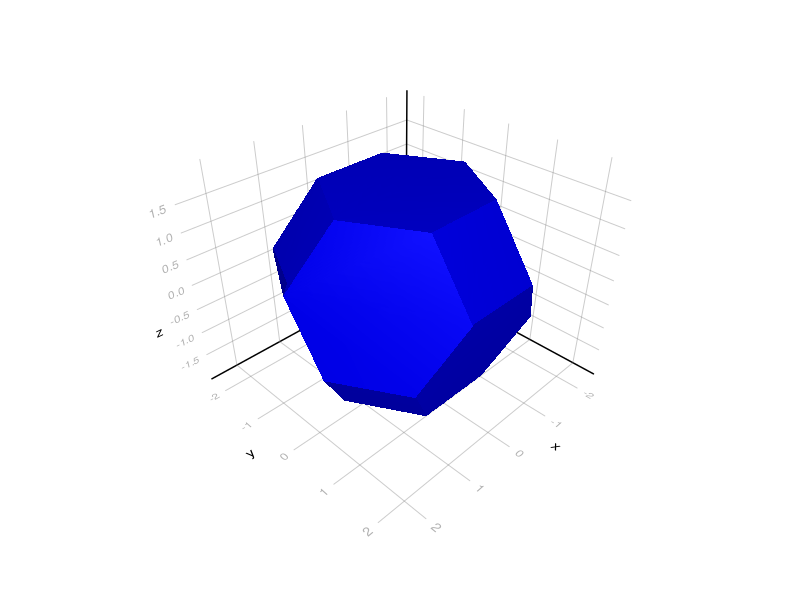

In [8]:
Makie.mesh(m, color=:blue)

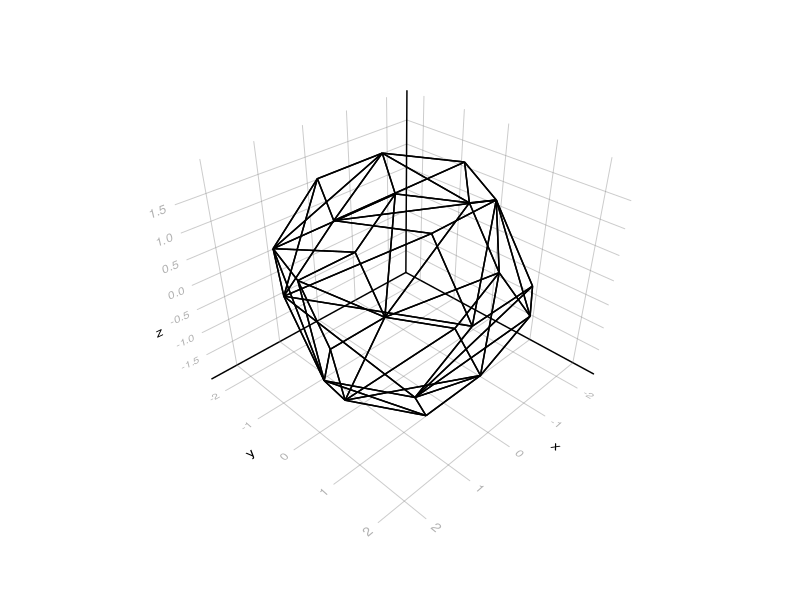

In [9]:
Makie.wireframe(m)